In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup, Comment
import re

In [3]:
html = urlopen("https://en.wikipedia.org/wiki/Kyung_Hee_University")

In [4]:
bs0bj  = BeautifulSoup(html, "html.parser")

In [5]:
contents = bs0bj.find("div", {"class":"mw-parser-output"})

#print(contents)
if contents.find("table", {"class": "box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove"}):
    contents.find("table", {"class": "box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove"}).decompose()
#밑에 style tag
if contents.find("style"):
    contents.find("style").decompose()

#밑에 authority control tag
if contents.find("table", {"class", "nowraplinks hlist navbox-inner"}):
    contents.find("table", {"class", "nowraplinks hlist navbox-inner"}).decompose()
    
    
    

In [6]:
#Get rid of Comments <!--  -->
a=1
for element in contents(text=lambda text: isinstance(text, Comment)):
    print(a)
    print(element)
    a+=1
    element.extract()

1
 
NewPP limit report
Parsed by mw1315
Cached time: 20191124131835
Cache expiry: 2592000
Dynamic content: false
Complications: [vary‐revision‐sha1]
CPU time usage: 1.184 seconds
Real time usage: 1.520 seconds
Preprocessor visited node count: 4667/1000000
Preprocessor generated node count: 0/1500000
Post‐expand include size: 184557/2097152 bytes
Template argument size: 28666/2097152 bytes
Highest expansion depth: 17/40
Expensive parser function count: 9/500
Unstrip recursion depth: 1/20
Unstrip post‐expand size: 120670/5000000 bytes
Number of Wikibase entities loaded: 3/400
Lua time usage: 0.660/10.000 seconds
Lua memory usage: 21.07 MB/50 MB

2

Transclusion expansion time report (%,ms,calls,template)
100.00% 1307.192      1 -total
 34.88%  455.917      1 Template:Reflist
 25.91%  338.734      4 Template:Infobox
 23.03%  301.022     36 Template:Cite_web
 19.02%  248.621      1 Template:Infobox_Korean_name
 15.45%  201.962      1 Template:Infobox_Chinese/Korean
 13.26%  173.350      2 

In [7]:
contents

<div class="mw-parser-output"><div class="shortdescription nomobile noexcerpt noprint searchaux" style="display:none">South Korean university</div>
<table class="infobox vcard" style="width:22em"><caption class="fn org">Kyung Hee University</caption><tbody><tr><td colspan="2" style="text-align:center"><div class="nickname" lang="ko">경희대학교</div></td></tr><tr><td colspan="2" style="text-align:center"><a class="image" href="/wiki/File:Kyung_Hee_University_Logo.png" title="Kyung Hee University logo"><img alt="Kyung Hee University logo" data-file-height="305" data-file-width="1257" decoding="async" height="53" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Kyung_Hee_University_Logo.png/220px-Kyung_Hee_University_Logo.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Kyung_Hee_University_Logo.png/330px-Kyung_Hee_University_Logo.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Kyung_Hee_University_Logo.png/440px-Kyung_Hee_University_Logo.png 2x" width="22

## Count the number of H2

In [8]:
h2_elements =contents.find_all('h2')

In [9]:

print(len(h2_elements))

13


## Count the number of H3

In [10]:
h3_elements =contents.find_all('h3')

In [11]:
print(len(h3_elements))

18


## Count the number of IMG

In [12]:
img_elements =contents.find_all('img')

In [13]:
print(len(img_elements))

7


## Count the number of Link

In [14]:
for link in contents.findAll("a"):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/File:Kyung_Hee_University_Logo.png
#cite_note-1
#cite_note-2
/wiki/Private_university
/wiki/University_president
#cite_note-3
#cite_note-대학현황-4
#cite_note-대학현황-4
#cite_note-대학현황-4
/wiki/Undergraduate_education
#cite_note-대학현황-4
/wiki/Postgraduate_education
#cite_note-대학현황-4
/wiki/Seoul
/wiki/Suwon
/wiki/South_Korea
/wiki/Urban_area
/wiki/School_colors
/wiki/Crimson
/wiki/Alliance_of_Asian_Liberal_Arts_Universities
#cite_note-5
https://www.khu.ac.kr/kor/main/index.do
/wiki/Hangul
/wiki/Hanja
https://en.wiktionary.org/wiki/%E6%85%B6
https://en.wiktionary.org/wiki/%E7%86%99
https://en.wiktionary.org/wiki/%E5%A4%A7%E5%AD%B8%E6%A0%A1
/wiki/Revised_Romanization_of_Korean
/wiki/McCune%E2%80%93Reischauer
/wiki/Hangul
/wiki/Hanja
/wiki/Private_university
/wiki/Seoul
/wiki/Suwon
#cite_note-:0-6
#cite_note-7
#cite_note-8
/wiki/Kindergarten
/wiki/Graduate_school
#cite_note-9
/wiki/Undergraduate_education
#cite_note-대학현황-4
/wiki/International_student
#cite_note-10
/wiki/Traditional_Korean_med

In [15]:
#Count the internal Link(Other documents)
total_link = 0;
for link in contents.findAll("a", href=re.compile("^(/wiki/)((?!:).)*$")):
    if 'href' in link.attrs:
        #print(link.attrs['href'])
        total_link+=1

print(total_link)

335


In [16]:
#Count the External Link(http:// or https://)
external_link = 0;
for link in contents.findAll("a", href=re.compile("http*")):
    if 'href' in link.attrs:
        #print(link.attrs['href'])
        external_link+=1;
print(external_link)

74


In [17]:
internal_link = total_link-external_link
print(internal_link)

261


## Count the number of Words

In [18]:
contents_text = contents.get_text()

In [19]:
print(contents_text)
#type(contents_text)

South Korean university
Kyung Hee University경희대학교Former nameSin Heung Junior CollegeSin Heung CollegeMotto"학원의 민주화, 사상의 민주화, 생활의 민주화"[1]Motto in English"Democratization of school, democratization of thought, democratization of living"[2]TypePrivateEstablished1949PresidentInwon Choue[3]Academic staff1,442 (2018)[4]Administrative staff446 (2018)[4]Students33,487 (2018)[4]Undergraduates26,063 (2018)[4]Postgraduates7,424 (2018)[4]LocationSeoul and Suwon, South KoreaCampusUrbanLanguageKorean and EnglishColorsCrimson      AffiliationsAALAUMascotLaughing Lion[5]Websitewww.khu.ac.kr
Kyung Hee UniversityHangul경희대학교Hanja慶熙大學校Revised RomanizationGyeonghui DaehakgyoMcCune–ReischauerKyŏnghŭi TaehakkyoKyung Hee University (Hangul: 경희대학교; Hanja: 慶熙大學校) is a private university in South Korea with campuses in Seoul and Suwon.[6] Founded in 1949, it is considered one of the best universities in South Korea.[7][8] Kyung Hee University is part of the Kyung Hee University System, which offers comprehensive

In [20]:
contents_text=contents_text.replace(" ", "")
contents_text=contents_text.replace("\n", "")

In [21]:
contents_text

'SouthKoreanuniversityKyungHeeUniversity경희대학교FormernameSinHeungJuniorCollegeSinHeungCollegeMotto"학원의민주화,사상의민주화,생활의민주화"[1]Mottoin\xa0English"Democratizationofschool,democratizationofthought,democratizationofliving"[2]TypePrivateEstablished1949PresidentInwonChoue[3]Academicstaff1,442(2018)[4]Administrativestaff446(2018)[4]Students33,487(2018)[4]Undergraduates26,063(2018)[4]Postgraduates7,424(2018)[4]LocationSeoulandSuwon,SouthKoreaCampusUrbanLanguageKoreanandEnglishColorsCrimson\xa0\xa0\xa0\xa0\xa0\xa0AffiliationsAALAUMascotLaughingLion[5]Websitewww.khu.ac.krKyungHeeUniversityHangul경희대학교Hanja慶熙大學校RevisedRomanizationGyeonghuiDaehakgyoMcCune–ReischauerKyŏnghŭiTaehakkyoKyungHeeUniversity(Hangul:경희대학교;Hanja:慶熙大學校)isaprivateuniversityinSouthKoreawithcampusesinSeoulandSuwon.[6]Foundedin1949,itisconsideredoneofthebestuniversitiesinSouthKorea.[7][8]KyungHeeUniversityispartoftheKyungHeeUniversitySystem,whichofferscomprehensiveeducationfromkindergartenthroughgraduateschool.[9]Asof2018,about33,000s

In [22]:
len(contents_text)

22853

## Let's use the Excel Table from QS

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.plotting import scatter_matrix
import seaborn as sns

%matplotlib inline



mpl.rcParams['axes.unicode_minus'] = False

In [24]:
df = pd.read_excel('2020-QS-World-University-Rankings-v1.0.xlsx')

In [25]:
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,You can also ccess the full results on www.top...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2019,Institution Name,NaN,Classification,NaN,NaN,NaN,NaN,Academic Reputation,...,NaN,Faculty Student,NaN,Citations per Faculty,NaN,International Faculty,NaN,International Students,NaN,Overall Score
3,NaN,NaN,NaN,NaN,SIZE,FOCUS,RES.,AGE,STATUS,SCORE,...,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,NaN
4,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
5,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
6,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
7,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
8,5,4,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9
9,6,7,ETH Zurich (Swiss Federal Institute of Technol...,Switzerland,L,CO,VH,5,A,98.4,...,25,85,113,98.4,15,100,19,98,53,95.9


In [26]:
col_list=list(df.columns.values)

In [27]:
col_list

['Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21']

In [28]:
#df.drop(col_list[1], inplace=True, axis=1)
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,You can also ccess the full results on www.top...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,2019,Institution Name,NaN,Classification,NaN,NaN,NaN,NaN,Academic Reputation,...,NaN,Faculty Student,NaN,Citations per Faculty,NaN,International Faculty,NaN,International Students,NaN,Overall Score
3,NaN,NaN,NaN,NaN,SIZE,FOCUS,RES.,AGE,STATUS,SCORE,...,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,NaN
4,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
5,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
6,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
7,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
8,5,4,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9
9,6,7,ETH Zurich (Swiss Federal Institute of Technol...,Switzerland,L,CO,VH,5,A,98.4,...,25,85,113,98.4,15,100,19,98,53,95.9


In [29]:
col_list = list(df.iloc[3])
col_list[0]='Ranking'
col_list[2]='InstitutionName'
col_list[3]='Country'

In [30]:
col_list

['Ranking',
 nan,
 'InstitutionName',
 'Country',
 'SIZE',
 'FOCUS',
 'RES.',
 'AGE',
 'STATUS',
 'SCORE',
 'RANK',
 'SCORE',
 'RANK',
 'SCORE',
 'RANK',
 'SCORE',
 'RANK',
 'SCORE',
 'RANK',
 'SCORE',
 'RANK',
 nan]

In [31]:
df1 = df.shift(-4)
df1.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4


In [32]:
df1.columns = col_list
df1.head()

,Ranking,NaN,InstitutionName,Country,SIZE,FOCUS,RES.,AGE,STATUS,SCORE,...,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,NaN
0,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,4,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9


In [33]:
col_names2=list(df1.columns)

In [34]:
col_names2[21]='Overall_Score'

In [35]:
df1.columns=col_names2

In [36]:
df1

,Ranking,NaN,InstitutionName,Country,SIZE,FOCUS,RES.,AGE,STATUS,SCORE,...,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,Overall_Score
0,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,4,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,NaN,NaN,Find the rankings methodology on www.iu.qs.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df1[df1['InstitutionName'] == 'University of Eastern Finland']

,Ranking,NaN,InstitutionName,Country,SIZE,FOCUS,RES.,AGE,STATUS,SCORE,...,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,Overall_Score
499,498=,481=,University of Eastern Finland,Finland,M,CO,VH,3,A,14.5,...,501+,43.8,346,33.5,399,27.9,476,9.1,601+,24.2


In [38]:
df1

,Ranking,NaN,InstitutionName,Country,SIZE,FOCUS,RES.,AGE,STATUS,SCORE,...,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,Overall_Score
0,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,4,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,NaN,NaN,Find the rankings methodology on www.iu.qs.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#Some ranking integer has '=' when they hare same ranking with other universities. We have to remove that

df1['Ranking']=df1['Ranking'].astype('str')

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 22 columns):
Ranking            1032 non-null object
nan                952 non-null object
InstitutionName    1025 non-null object
Country            1024 non-null object
SIZE               1024 non-null object
FOCUS              1001 non-null object
RES.               1000 non-null object
AGE                1001 non-null object
STATUS             982 non-null object
SCORE              1024 non-null object
RANK               1024 non-null object
SCORE              1024 non-null object
RANK               1024 non-null object
SCORE              1024 non-null object
RANK               1024 non-null object
SCORE              1024 non-null object
RANK               1024 non-null object
SCORE              978 non-null object
RANK               1019 non-null object
SCORE              1018 non-null object
RANK               1023 non-null object
Overall_Score      1024 non-null object
dtypes: object(2

In [41]:
ranking=df1['Ranking']

In [42]:
type(ranking[498])

str

In [43]:
a=ranking[498]

In [44]:
a.replace("=","")

'  498'

In [45]:
for i in range(len(ranking)):
    replace=ranking[i].replace("=", "")
    strip=replace.strip()
    ranking[i]=strip

/Users/sanghyuk/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/sanghyuk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [46]:
df1['Ranking']=ranking

In [47]:
df1

,Ranking,NaN,InstitutionName,Country,SIZE,FOCUS,RES.,AGE,STATUS,SCORE,...,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,Overall_Score
0,1,1,Massachusetts Institute of Technology (MIT),United States,M,CO,VH,5,B,100,...,4,100,15,99.8,7,100,43,94.1,87,100
1,2,2,Stanford University,United States,L,FC,VH,5,B,100,...,5,100,12,98.6,13,99.8,62,67.7,196,98.4
2,3,3,Harvard University,United States,L,FC,VH,5,B,100,...,1,98.7,40,99.6,8,86.3,186,62.2,221,97.4
3,4,5,University of Oxford,United Kingdom,L,FC,VH,5,A,100,...,3,100,8,84.7,45,99.7,64,98.5,50,97.2
4,5,4,California Institute of Technology (Caltech),United States,S,CO,VH,5,B,97.8,...,74,100,4,100,4,99.4,72,87.3,121,96.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,nan,NaN,Find the rankings methodology on www.iu.qs.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_use=df1[['InstitutionName','Ranking', 'Overall_Score']]

In [49]:
df_use[df_use['InstitutionName'] == 'University of Eastern Finland']

,InstitutionName,Ranking,Overall_Score
499,University of Eastern Finland,498,24.2


In [50]:
top500=df_use[:500]

In [51]:
top500

,InstitutionName,Ranking,Overall_Score
0,Massachusetts Institute of Technology (MIT),1,100
1,Stanford University,2,98.4
2,Harvard University,3,97.4
3,University of Oxford,4,97.2
4,California Institute of Technology (Caltech),5,96.9
...,...,...,...
495,University of Delaware,491,24.3
496,V.N. Karazin Kharkiv National University,491,24.3
497,Czech Technical University In Prague,498,24.2
498,Université de Montpellier,498,24.2


# Let's prepare for crawling

In [52]:
import re

In [53]:
uni_name_list=list(top500['InstitutionName'])

In [54]:
regex = re.compile('\(([^)]+)\)')
for i in range(len(uni_name_list)):
        uni_name=uni_name_list[i]
        sub=regex.sub('', uni_name)
        uni_name_changed=sub.strip().replace(' ', '_')
        uni_name_list[i]=uni_name_changed

In [55]:
uni_name_list 
#Ready

['Massachusetts_Institute_of_Technology',
 'Stanford_University',
 'Harvard_University',
 'University_of_Oxford',
 'California_Institute_of_Technology',
 'ETH_Zurich',
 'University_of_Cambridge',
 'UCL',
 'Imperial_College_London',
 'University_of_Chicago',
 'Nanyang_Technological_University',
 'National_University_of_Singapore',
 'Princeton_University',
 'Cornell_University',
 'University_of_Pennsylvania',
 'Tsinghua_University',
 'Yale_University',
 'Columbia_University',
 'Ecole_Polytechnique_Fédérale_de_Lausanne',
 'University_of_Edinburgh',
 'University_of_Michigan',
 'Peking_University',
 'The_University_of_Tokyo',
 'Johns_Hopkins_University',
 'Duke_University',
 'University_of_Hong_Kong',
 'The_University_of_Manchester',
 'University_of_California,_Berkeley',
 'Australian_National_University',
 'University_of_Toronto',
 'Northwestern_University',
 'The_Hong_Kong_University_of_Science_and_Technology',
 "King's_College_London",
 'Kyoto_University',
 'McGill_University',
 'Univers

### Change Some 404 Error

In [56]:
uni_name_list[uni_name_list.index('Université_Aix-Marseille')]='Aix-Marseille_University'

In [57]:
uni_name_list[uni_name_list.index('Sapienza_-_Università_di_Roma')]='Sapienza_University_of_Rome'

In [58]:
uni_name_list[uni_name_list.index('KAIST_-_Korea_Advanced_Institute_of_Science_and_Technology')]='KAIST'

In [248]:
uni_name_list[uni_name_list.index('The_University_of_Warwick')]='University_of_Warwick'

ValueError: 'The_University_of_Warwick' is not in list

In [60]:
uni_name_list[uni_name_list.index('KIT,_Karlsruher_Institut_für_Technologie')]='Karlsruhe_Institute_of_Technology'

In [61]:
uni_name_list[uni_name_list.index("Scuola_Superiore_Sant'Anna_Pisa")]='Scuola_Normale_Superiore_di_Pisa'

In [62]:
uni_name_list[uni_name_list.index("Universidad_de_Los_Andes_Colombia")]='University_of_Los_Andes_(Colombia)'

In [63]:
uni_name_list[uni_name_list.index("Rutgers_-_The_State_University_of_New_Jersey,_New_Brunswick")]='Rutgers_University–New_Brunswick'

In [64]:
uni_name_list[uni_name_list.index("Moscow_Institute_of_Physics_and_Technology_State_University")]='Moscow_Institute_of_Physics_and_Technology'

In [65]:
uni_name_list[uni_name_list.index("SOAS_-_School_of_Oriental_and_African_Studies,_University_of_London")]='SOAS_University_of_London'


In [66]:
uni_name_list[uni_name_list.index("University_of_Hawaii_at_Mā\x81noa")]='University_of_Hawaii_at_Manoa'

In [67]:
uni_name_list[uni_name_list.index("Moscow_State_Institute_of_International_Relations_–_MGIMO_University")]='Moscow_State_Institute_of_International_Relations'

In [68]:
uni_name_list[uni_name_list.index("National_University_of_Sciences_and_Technology__Islamabad")]='National_University_of_Sciences_%26_Technology'


In [69]:
uni_name_list[uni_name_list.index("HUFS_–_Hankuk__University_of_Foreign_Studies")]='Hankuk_University_of_Foreign_Studies'


In [70]:
uni_name_list[uni_name_list.index("Johannes_Gutenberg_Universität_Mainz")]='Johannes_Gutenberg_University_Mainz'


In [71]:
uni_name_list[uni_name_list.index("Ben_Gurion_University_of_The_Negev")]='Ben-Gurion_University_of_the_Negev'


In [72]:
uni_name_list[uni_name_list.index("Peter_the_Great_St.Petersburg_Polytechnic_University")]='Peter_the_Great_St._Petersburg_Polytechnic_University'


In [73]:
#uni_name_list[uni_name_list.index("National_University_of_Science_and_Technology_\"MISIS"")]='Peter_the_Great_St._Petersburg_Polytechnic_University'


SyntaxError: EOL while scanning string literal (<ipython-input-73-5d3729109b00>, line 1)

In [75]:
uni_name_list[451]='National_University_of_Science_and_Technology_MISiS_(Russia)'

In [ ]:
## uni_name_list[uni_name_list.index('M.O.Auezov_South_Kazakhstan_State_University')] 
## There's no Wiki Document of this University

In [76]:
uni_name_list[uni_name_list.index("Czech_Technical_University_In_Prague")]='Czech_Technical_University_in_Prague'


In [77]:
top500['InstitutionName']=uni_name_list

/Users/sanghyuk/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
top500.tail(10)

,InstitutionName,Ranking,Overall_Score
490,Indian_Institute_of_Technology_Guwahati,491,24.3
491,Lappeenranta_University_of_Technology,491,24.3
492,M.O.Auezov_South_Kazakhstan_State_University,491,24.3
493,Universidad_de_Montevideo,491,24.3
494,Aix-Marseille_University,491,24.3
495,University_of_Delaware,491,24.3
496,V.N._Karazin_Kharkiv_National_University,491,24.3
497,Czech_Technical_University_in_Prague,498,24.2
498,Université_de_Montpellier,498,24.2
499,University_of_Eastern_Finland,498,24.2


In [461]:

random_subset = top500.sample(n=50)
print(random_subset.head(50))

random_uni_list = list(random_subset['InstitutionName'])

                                       InstitutionName Ranking Overall_Score
21                                   Peking_University      22          84.3
443                                    Bond_University     442            26
362                                 Yeshiva_University     359          30.5
306                          Xi'an_Jiaotong_University     307          34.1
248                               Kyung_Hee_University     247          38.3
303                               University_of_Dundee     302          34.3
455                                  Sogang_University     454          25.6
344  Pontificia_Universidad_Católica_Argentina_Sant...     344          31.7
182                       Erasmus_University_Rotterdam     183          46.1
454            National_Technical_University_of_Athens     454          25.6
239                              Maastricht_University     239            39
3                                 University_of_Oxford       4          97.2

## Make Crawler Function with the logic above 

In [462]:
from urllib.request import urlopen
from urllib.parse import quote  
from bs4 import BeautifulSoup, Comment
import re

In [463]:
random_uni_list
example=uni_name_list[0:2]



In [464]:
random_uni_list[10]

'Maastricht_University'

In [465]:
for i in range(len(random_uni_list)):
    print(random_uni_list[i])

Peking_University
Bond_University
Yeshiva_University
Xi'an_Jiaotong_University
Kyung_Hee_University
University_of_Dundee
Sogang_University
Pontificia_Universidad_Católica_Argentina_Santa_María_de_los_Buenos_Aires
Erasmus_University_Rotterdam
National_Technical_University_of_Athens
Maastricht_University
University_of_Oxford
ENS_Paris-Saclay
Macquarie_University
University_of_Coimbra
University_of_Ghent
University_at_Buffalo_SUNY
James_Cook_University
Universidade_Nova_de_Lisboa
University_of_Indonesia
University_of_Aberdeen
Shanghai_University
University_of_Connecticut
KTH,_Royal_Institute_of_Technology
University_of_Science_and_Technology_of_China
Nankai_University
Université_de_Montréal
Universiti_Teknologi_Petronas
North_Carolina_State_University
Indian_Institute_of_Technology_Kharagpur
Harbin_Institute_of_Technology
National_University_of_Science_and_Technology_MISiS_(Russia)
Yonsei_University
University_of_Saskatchewan
Universität_Ulm
Technical_University_of_Denmark
University_of_C

In [466]:
uni_name_for_h2[402]

'National_University_of_Sciences_%26_Technology'

In [467]:
entire_list=[]
for i in range(len(random_uni_list)):
        crawler_result=[]
        
        if random_uni_list[i]=='National_University_of_Sciences_%26_Technology':
            #redirect Error 400
            print('National_University_of_Sciences_%26_Technology')
            continue
        if random_uni_list[i]=='M.O.Auezov_South_Kazakhstan_State_University':
            print('M.O.Auezov_South_Kazakhstan_State_University')
            continue
            
        else:
            name_of_uni="https://en.wikipedia.org/wiki/"+quote(random_uni_list[i])
        
        crawler_result.append(random_uni_list[i])
        
        print(type(random_uni_list[i]))
        #name_of_uni=random_uni_list[i].encode('ascii', 'ignore').decode('ascii')
        print(type(random_uni_list[i]))
        name_of_uni="https://en.wikipedia.org/wiki/"+quote(random_uni_list[i])
        print(name_of_uni)
        html = urlopen(name_of_uni)
        bs0bj  = BeautifulSoup(html, "html.parser")
        contents = bs0bj.find("div", {"class":"mw-parser-output"})
        #remove irrelevant table
        if contents.find("table", {"class": "box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove"}):
            contents.find("table", {"class": "box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove"}).decompose()
        #remove style tag
        if contents.find("style"):
            contents.find("style").decompose()
        #remove authority control 
        if contents.find("table", {"class", "nowraplinks hlist navbox-inner"}):
            contents.find("table", {"class", "nowraplinks hlist navbox-inner"}).decompose()
        #Get rid of Comments <!--  -->

        for element in contents(text=lambda text: isinstance(text, Comment)):
            #print(a)
            #print(element)
            element.extract()
        
        
        #count the h2
        h2_elements =contents.find_all('h2')
        #print(len(h2_elements))
        crawler_result.append(len(h2_elements))
        
        #count the h3
        h3_elements =contents.find_all('h3')
        #print(len(h3_elements))
        crawler_result.append(len(h3_elements))
        
        #count the img
        img_elements =contents.find_all('img')
        #print(len(img_elements))
        crawler_result.append(len(img_elements))
        
        #count the link
        #for link in contents.findAll("a"):
        #    if 'href' in link.attrs:
        #        print(link.attrs['href'])
                
        #Count the internal Link(Other documents)
        total_link = 0;
        for link in contents.findAll("a", href=re.compile("^(/wiki/)((?!:).)*$")):
            if 'href' in link.attrs:
                #print(link.attrs['href'])
                total_link+=1

        crawler_result.append(total_link)
        
        #Count the External Link(http:// or https://)
        external_link = 0;
        for link in contents.findAll("a", href=re.compile("http*")):
            if 'href' in link.attrs:
                #print(link.attrs['href'])
                external_link+=1;
        #print(external_link)
        crawler_result.append(external_link)
        
        #internal link
        internal_link = total_link-external_link
        print(internal_link)
        crawler_result.append(internal_link)
        
        #Count the number of words
        contents_text = contents.get_text()
        contents_text=contents_text.replace(" ", "")
        contents_text=contents_text.replace("\n", "")
        len_contents=len(contents_text)
        crawler_result.append(len_contents)
        
        
        entire_list.append(crawler_result)
        print(i)
        

<class 'str'>
<class 'str'>
https://en.wikipedia.org/wiki/Peking_University
798
0
<class 'str'>
<class 'str'>
https://en.wikipedia.org/wiki/Bond_University
67
1
<class 'str'>
<class 'str'>
https://en.wikipedia.org/wiki/Yeshiva_University
268
2
<class 'str'>
<class 'str'>
https://en.wikipedia.org/wiki/Xi%27an_Jiaotong_University
540
3
<class 'str'>
<class 'str'>
https://en.wikipedia.org/wiki/Kyung_Hee_University
261
4
<class 'str'>
<class 'str'>
https://en.wikipedia.org/wiki/University_of_Dundee
507
5
<class 'str'>
<class 'str'>
https://en.wikipedia.org/wiki/Sogang_University
193
6
<class 'str'>
<class 'str'>
https://en.wikipedia.org/wiki/Pontificia_Universidad_Cat%C3%B3lica_Argentina_Santa_Mar%C3%ADa_de_los_Buenos_Aires
169
7
<class 'str'>
<class 'str'>
https://en.wikipedia.org/wiki/Erasmus_University_Rotterdam
247
8
<class 'str'>
<class 'str'>
https://en.wikipedia.org/wiki/National_Technical_University_of_Athens
212
9
<class 'str'>
<class 'str'>
https://en.wikipedia.org/wiki/Maastrich

In [434]:
entire_list

[['Royal_Holloway_University_of_London', 12, 22, 36, 836, 111, 725, 50554],
 ['Lund_University', 11, 24, 23, 568, 102, 466, 41046],
 ['Università_degli_Studi_di_Padova', 9, 2, 6, 413, 25, 388, 16357],
 ['Universität_Freiburg', 11, 10, 11, 261, 39, 222, 18429],
 ['University_of_Chicago', 11, 18, 35, 1186, 360, 826, 80730],
 ['University_of_Chemistry_and_Technology,_Prague', 6, 7, 3, 68, 7, 61, 5280],
 ['Rensselaer_Polytechnic_Institute', 14, 19, 26, 485, 176, 309, 60343],
 ['King_Abdul_Aziz_University', 10, 6, 8, 95, 34, 61, 11864],
 ['Indian_Institute_of_Technology_Bombay', 13, 3, 17, 410, 56, 354, 26094],
 ['Eberhard_Karls_Universität_Tübingen', 16, 19, 32, 504, 66, 438, 33946],
 ['National_Tsing_Hua_University', 13, 7, 13, 378, 32, 346, 21197],
 ['Swansea_University', 11, 16, 25, 491, 198, 293, 49827],
 ['University_of_Otago', 14, 16, 25, 347, 83, 264, 33348],
 ['Gwangju_Institute_of_Science_and_Technology', 7, 5, 2, 31, 35, -4, 6349],
 ['Northwestern_University', 12, 21, 23, 1167, 2

In [468]:
uni_info_columns=['Univ_Name', 'H2', 'H3', 'IMG', 'Total_Link', 'External_Link', 'Internal_Link','Number_Of_Letters']
uni_info_df=pd.DataFrame(entire_list, columns=uni_info_columns)


In [469]:
uni_info_df

,Univ_Name,H2,H3,IMG,Total_Link,External_Link,Internal_Link,Number_Of_Letters
0,Peking_University,14,8,40,906,108,798,47963
1,Bond_University,11,3,8,182,115,67,22442
2,Yeshiva_University,11,7,3,350,82,268,27879
3,Xi'an_Jiaotong_University,9,4,9,574,34,540,25211
4,Kyung_Hee_University,13,18,7,335,74,261,22853
5,University_of_Dundee,12,24,36,618,111,507,51787
6,Sogang_University,9,7,5,218,25,193,10441
7,Pontificia_Universidad_Católica_Argentina_Sant...,9,10,5,184,15,169,12944
8,Erasmus_University_Rotterdam,11,26,28,282,35,247,21418
9,National_Technical_University_of_Athens,13,17,14,383,171,212,36831


In [470]:
top500

,InstitutionName,Ranking,Overall_Score
0,Massachusetts_Institute_of_Technology,1,100
1,Stanford_University,2,98.4
2,Harvard_University,3,97.4
3,University_of_Oxford,4,97.2
4,California_Institute_of_Technology,5,96.9
...,...,...,...
495,University_of_Delaware,491,24.3
496,V.N._Karazin_Kharkiv_National_University,491,24.3
497,Czech_Technical_University_in_Prague,498,24.2
498,Université_de_Montpellier,498,24.2


In [471]:
top500

,InstitutionName,Ranking,Overall_Score
0,Massachusetts_Institute_of_Technology,1,100
1,Stanford_University,2,98.4
2,Harvard_University,3,97.4
3,University_of_Oxford,4,97.2
4,California_Institute_of_Technology,5,96.9
...,...,...,...
495,University_of_Delaware,491,24.3
496,V.N._Karazin_Kharkiv_National_University,491,24.3
497,Czech_Technical_University_in_Prague,498,24.2
498,Université_de_Montpellier,498,24.2


In [472]:
top500_list=list(top500['InstitutionName'])

In [473]:
index_list=[]
for i in range(len(uni_info_df['Univ_Name'])):
    index_list.append(top500_list.index(random_uni_list[i]))

In [474]:
ranking_list=top500.iloc[index_list]

In [475]:
ranking_list.shape

(50, 3)

In [476]:
Overall_Score=list(ranking_list['Overall_Score'])
Ranking=list(ranking_list['Ranking'])

In [477]:
uni_info_df

,Univ_Name,H2,H3,IMG,Total_Link,External_Link,Internal_Link,Number_Of_Letters
0,Peking_University,14,8,40,906,108,798,47963
1,Bond_University,11,3,8,182,115,67,22442
2,Yeshiva_University,11,7,3,350,82,268,27879
3,Xi'an_Jiaotong_University,9,4,9,574,34,540,25211
4,Kyung_Hee_University,13,18,7,335,74,261,22853
5,University_of_Dundee,12,24,36,618,111,507,51787
6,Sogang_University,9,7,5,218,25,193,10441
7,Pontificia_Universidad_Católica_Argentina_Sant...,9,10,5,184,15,169,12944
8,Erasmus_University_Rotterdam,11,26,28,282,35,247,21418
9,National_Technical_University_of_Athens,13,17,14,383,171,212,36831


In [478]:
uni_info_df['OverAll']=Overall_Score
uni_info_df['Ranking']=Ranking
uni_info_df

,Univ_Name,H2,H3,IMG,Total_Link,External_Link,Internal_Link,Number_Of_Letters,OverAll,Ranking
0,Peking_University,14,8,40,906,108,798,47963,84.3,22
1,Bond_University,11,3,8,182,115,67,22442,26.0,442
2,Yeshiva_University,11,7,3,350,82,268,27879,30.5,359
3,Xi'an_Jiaotong_University,9,4,9,574,34,540,25211,34.1,307
4,Kyung_Hee_University,13,18,7,335,74,261,22853,38.3,247
5,University_of_Dundee,12,24,36,618,111,507,51787,34.3,302
6,Sogang_University,9,7,5,218,25,193,10441,25.6,454
7,Pontificia_Universidad_Católica_Argentina_Sant...,9,10,5,184,15,169,12944,31.7,344
8,Erasmus_University_Rotterdam,11,26,28,282,35,247,21418,46.1,183
9,National_Technical_University_of_Athens,13,17,14,383,171,212,36831,25.6,454


In [479]:
column_names_of_uni=list(uni_info_df.columns)

In [480]:
column_names_of_uni

['Univ_Name',
 'H2',
 'H3',
 'IMG',
 'Total_Link',
 'External_Link',
 'Internal_Link',
 'Number_Of_Letters',
 'OverAll',
 'Ranking']

In [481]:
h2_number=uni_info_df[column_names_of_uni[1]]
h3_number=uni_info_df[column_names_of_uni[2]]
img_number=uni_info_df[column_names_of_uni[3]]
total_link_number=uni_info_df[column_names_of_uni[4]]
external_link_number=uni_info_df[column_names_of_uni[5]]
internal_link_number=uni_info_df[column_names_of_uni[6]]
number_of_letters=uni_info_df[column_names_of_uni[7]]
overall_score=uni_info_df['OverAll']=uni_info_df[column_names_of_uni[8]]

## Scatter Plot

In [482]:
data = uni_info_df.iloc[:,1:-1].to_numpy()
X = data[:,:-1]
y = data[:,-1]
print(X.shape, y.shape)

(50, 7) (50,)


In [483]:
from sklearn.linear_model import LinearRegression

[0.00025702] 31.6432031155323


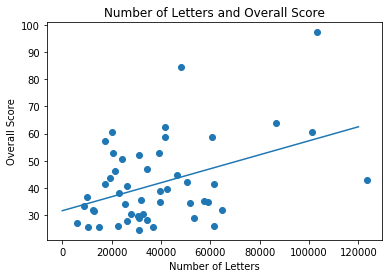

In [484]:

reg = LinearRegression()
reg.fit(X[:,-1:], y)
print(reg.coef_, reg.intercept_)

plt.scatter(X[:,-1], y)
xs = np.arange(0, 120000)
plt.plot(xs, xs * reg.coef_[0] + reg.intercept_)
plt.title('Number of Letters and Overall Score')
plt.xlabel('Number of Letters')
plt.ylabel('Overall Score')
plt.show()

[ 0.05250719 -0.00015965] 25.607016959536946


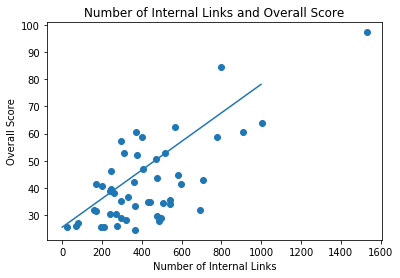

In [485]:

reg = LinearRegression()
reg.fit(X[:,-2:], y)
print(reg.coef_, reg.intercept_)

plt.scatter(X[:,-2], y)
xs = np.arange(0, 1000)
plt.plot(xs, xs * reg.coef_[0] + reg.intercept_)
plt.title('Number of Internal Links and Overall Score')
plt.xlabel('Number of Internal Links')
plt.ylabel('Overall Score')
plt.show()


# # Plot
# plt.scatter(h2_number, overall_score, s=area, c=colors, alpha=0.5)
# plt.title('Number of H2 and Overall Score')
# plt.xlabel('H2 Number')
# plt.ylabel('Overall Score')
# plt.show()

[ 0.03195343  0.05519684 -0.0002793 ] 25.84810346559503


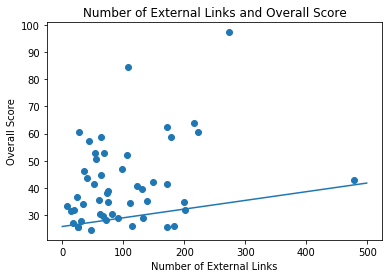

In [486]:

reg = LinearRegression()
reg.fit(X[:,-3:], y)
print(reg.coef_, reg.intercept_)

plt.scatter(X[:,-3], y)
xs = np.arange(0, 500)
plt.plot(xs, xs * reg.coef_[0] + reg.intercept_)
plt.title('Number of External Links and Overall Score')
plt.xlabel('Number of External Links')
plt.ylabel('Overall Score')
plt.show()



# colors = (0,0,0)
# area = np.pi*3
# # Plot
# plt.scatter(h3_number, overall_score, s=area, c=colors, alpha=0.5)
# plt.title('Number of H3 and Overall Score')
# plt.xlabel('H3 Number')
# plt.ylabel('Overall Score')
# plt.show()

[ 0.02905009  0.00290334  0.02614675 -0.0002793 ] 25.848103465600722


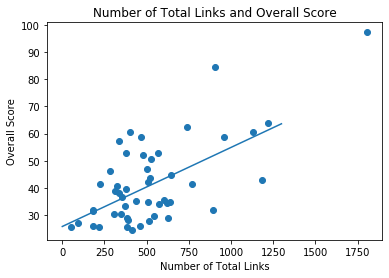

In [487]:
reg = LinearRegression()
reg.fit(X[:,-4:], y)
print(reg.coef_, reg.intercept_)

plt.scatter(X[:,-4], y)
xs = np.arange(0, 1300)
plt.plot(xs, xs * reg.coef_[0] + reg.intercept_)
plt.title('Number of Total Links and Overall Score')
plt.xlabel('Number of Total Links')
plt.ylabel('Overall Score')
plt.show()

# colors = (0,0,0)
# area = np.pi*3
# # Plot
# plt.scatter(img_number, overall_score, s=area, c=colors, alpha=0.5)
# plt.title('Number of Image and Overall Score')
# plt.xlabel('Image Number')
# plt.ylabel('Overall Score')
# plt.show()

[ 0.07680754  0.0239565   0.00146815  0.02248835 -0.00027137] 27.774571341178095


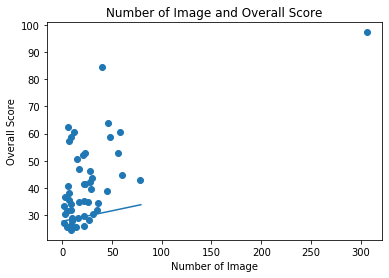

In [488]:
reg = LinearRegression()
reg.fit(X[:,-5:], y)
print(reg.coef_, reg.intercept_)

plt.scatter(X[:,-5], y)
xs = np.arange(0, 80)
plt.plot(xs, xs * reg.coef_[0] + reg.intercept_)
plt.title('Number of Image and Overall Score')
plt.xlabel('Number of Image')
plt.ylabel('Overall Score')
plt.show()




# colors = (0,0,0)
# area = np.pi*3
# # Plot
# plt.scatter(total_link_number, overall_score, s=area, c=colors, alpha=0.5)
# plt.title('Total Link and Overall Score')
# plt.xlabel('Total Link')
# plt.ylabel('Overall Score')
# plt.show()

[-0.09843772  0.08144043  0.02150562 -0.00208881  0.02359443 -0.00022208] 28.183427765529697


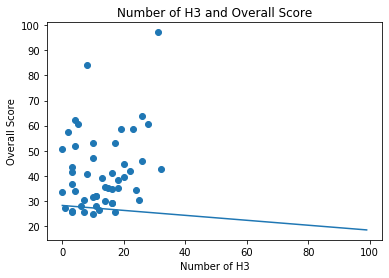

In [489]:
reg = LinearRegression()
reg.fit(X[:,-6:], y)
print(reg.coef_, reg.intercept_)

plt.scatter(X[:,-6], y)
xs = np.arange(0, 100)
plt.plot(xs, xs * reg.coef_[0] + reg.intercept_)
plt.title('Number of H3 and Overall Score')
plt.xlabel('Number of H3')
plt.ylabel('Overall Score')
plt.show()

# colors = (0,0,0)
# area = np.pi*3
# # Plot
# plt.scatter(external_link_number, overall_score, s=area, c=colors, alpha=0.5)
# plt.title('Number of External Links and Overall Score')
# plt.xlabel('External Links')
# plt.ylabel('Overall Score')
# plt.show()

[ 7.16263662e-01 -9.36816688e-02  8.37034229e-02  1.99915043e-02
 -6.05635935e-03  2.60478637e-02 -2.47828511e-04] 21.280409639457524


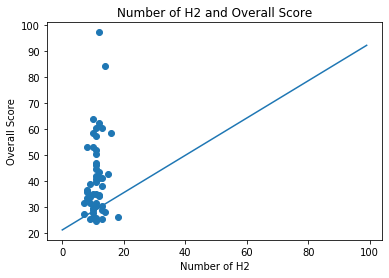

In [490]:
reg = LinearRegression()
reg.fit(X[:,0:], y)
print(reg.coef_, reg.intercept_)

plt.scatter(X[:,0], y)
xs = np.arange(0, 100)
plt.plot(xs, xs * reg.coef_[0] + reg.intercept_)
plt.title('Number of H2 and Overall Score')
plt.xlabel('Number of H2')
plt.ylabel('Overall Score')
plt.show()


# colors = (0,0,0)
# area = np.pi*3
# # Plot
# plt.scatter(internal_link_number, overall_score, s=area, c=colors, alpha=0.5)
# plt.title('Number of Internal Links and Overall Score')
# plt.xlabel('External Links')
# plt.ylabel('Overall Score')
# plt.show()

In [491]:
uni_info_df.head()

,Univ_Name,H2,H3,IMG,Total_Link,External_Link,Internal_Link,Number_Of_Letters,OverAll,Ranking
0,Peking_University,14,8,40,906,108,798,47963,84.3,22
1,Bond_University,11,3,8,182,115,67,22442,26.0,442
2,Yeshiva_University,11,7,3,350,82,268,27879,30.5,359
3,Xi'an_Jiaotong_University,9,4,9,574,34,540,25211,34.1,307
4,Kyung_Hee_University,13,18,7,335,74,261,22853,38.3,247


In [492]:
scatter_matrix_df=uni_info_df[['H2', 'H3', 'IMG', 'Total_Link','External_Link', 'Internal_Link', 'Number_Of_Letters', 'OverAll']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27b5ea90>,
      dtype=object)

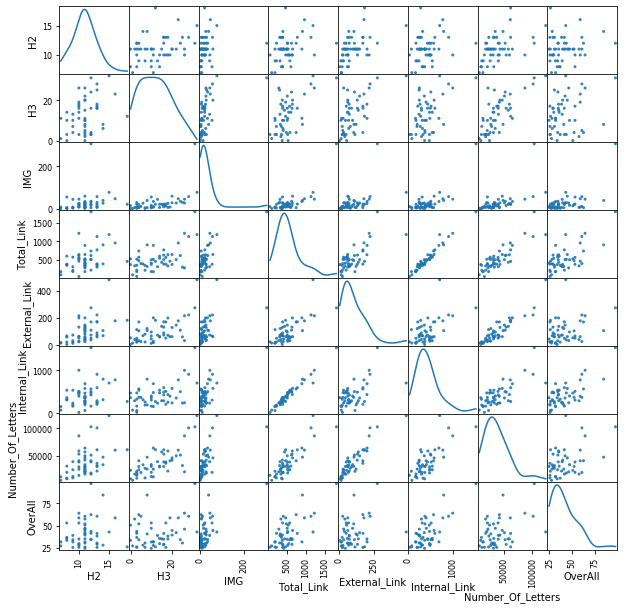

In [493]:
scatter_matrix(scatter_matrix_df, alpha=0.9, figsize=(10, 10), diagonal='kde')

In [494]:
scatter_matrix_df.corr()

,H2,H3,IMG,Total_Link,External_Link,Internal_Link,Number_Of_Letters,OverAll
H2,1.000000,0.350258,0.206988,0.358503,0.537250,0.262375,0.508524,0.176742
H3,0.350258,1.000000,0.516522,0.584852,0.611247,0.512932,0.744310,0.260280
IMG,0.206988,0.516522,1.000000,0.740472,0.502496,0.736295,0.607131,0.612302
Total_Link,0.358503,0.584852,0.740472,1.000000,0.735385,0.976186,0.861425,0.667477
External_Link,0.537250,0.611247,0.502496,0.735385,1.000000,0.570867,0.910856,0.304801
Internal_Link,0.262375,0.512932,0.736295,0.976186,0.570867,1.000000,0.752115,0.711142
Number_Of_Letters,0.508524,0.744310,0.607131,0.861425,0.910856,0.752115,1.000000,0.421218
OverAll,0.176742,0.260280,0.612302,0.667477,0.304801,0.711142,0.421218,1.000000


## Hypothesis Testing - Correlation coefficient

H0: ρ=0<br>
H1: ρ≠0

In [414]:
from scipy.stats import linregress
from scipy.stats import pearsonr

In [ ]:
h2_number=uni_info_df[column_names_of_uni[1]]
h3_number=uni_info_df[column_names_of_uni[2]]
img_number=uni_info_df[column_names_of_uni[3]]
total_link_number=uni_info_df[column_names_of_uni[4]]
external_link_number=uni_info_df[column_names_of_uni[5]]
internal_link_number=uni_info_df[column_names_of_uni[6]]
number_of_letters=uni_info_df[column_names_of_uni[7]]
overall_score=uni_info_df['OverAll']=uni_info_df[column_names_of_uni[8]]

In [418]:
#Correlation Test
data1 = h2_number
data2 = overall_score
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print('Probably independent')
# else:
# 	print('Probably dependent')
    

# print("Linear Regression Test")
# linregress(data1, data2)

stat=0.173, p=0.234


In [419]:
from scipy.stats import pearsonr
data1 = h3_number
data2 = overall_score
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print('Probably independent')
# else:
# 	print('Probably dependent')

stat=0.364, p=0.010


In [422]:
from scipy.stats import pearsonr
data1 = img_number
data2 = overall_score
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print('Probably independent')
# else:
# 	print('Probably dependent')

stat=0.563, p=0.000


In [423]:
from scipy.stats import pearsonr
data1 = total_link_number
data2 = overall_score
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print('Probably independent')
# else:
# 	print('Probably dependent')

stat=0.637, p=0.000


In [424]:
from scipy.stats import pearsonr
data1 = external_link_number
data2 = overall_score
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print('Probably independent')
# else:
# 	print('Probably dependent')

stat=0.510, p=0.000


In [425]:
from scipy.stats import pearsonr
data1 = internal_link_number
data2 = overall_score
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print('Probably independent')
# else:
# 	print('Probably dependent')

stat=0.615, p=0.000


In [426]:
from scipy.stats import pearsonr
data1 = number_of_letters
data2 = overall_score
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print('Probably independent')
# else:
# 	print('Probably dependent')

stat=0.522, p=0.000


## Simple Linear Regression

In [148]:
import statsmodels.api as sm

In [144]:
uni_info_df

,Univ_Name,H2,H3,IMG,Total_Link,External_Link,Internal_Link,Number_Of_Letters,OverAll,Ranking
0,University_of_Science_and_Technology_Beijing,9,2,11,444,18,426,17370,25.2,462
1,University_of_Oslo,14,18,26,309,38,271,26887,54.7,119
2,University_of_Delhi,11,11,27,711,80,631,34522,25.0,474
3,University_of_Waikato,9,4,14,230,34,196,17026,36.6,266
4,Yonsei_University,10,19,9,464,64,400,41439,58.7,104
5,National_University_of_Singapore,17,35,26,562,159,403,62628,91.8,11
6,Heriot-Watt_University,11,21,16,509,121,388,36156,33.4,314
7,"University_of_California,_Santa_Barbara",13,16,31,807,157,650,54632,52.3,135
8,Columbia_University,13,25,68,1327,414,913,113028,87.4,18
9,Khalifa_University,5,2,1,23,21,2,6287,36.5,268


In [145]:
# Number of Letter, Over All Ranking
# https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

In [152]:

X = uni_info_df["Number_Of_Letters"]
y = uni_info_df["OverAll"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


/Users/sanghyuk/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                OverAll   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     25.79
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           6.16e-06
Time:                        01:45:49   Log-Likelihood:                -201.90
No. Observations:                  50   AIC:                             407.8
Df Residuals:                      48   BIC:                             411.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                27.9901      3.627      7.717      0.000      20.697      35.283
Number_Of_Letters     0.0004   8.27e-05      5.079      0.000       0.000       0.001
==============================================================================
Omnibus:                        0.552   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.572
Skew:                           0.233   Prob(JB):                        0.751
Kurtosis:                       2.760   Cond. No.                     8.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## MultiVariable Linear Regression

In [155]:

X = uni_info_df[['H2','H3','IMG','Total_Link','External_Link','Internal_Link','Number_Of_Letters']]
y = uni_info_df["OverAll"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                OverAll   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4.724
Date:                Thu, 28 Nov 2019   Prob (F-statistic):           0.000893
Time:                        01:50:06   Log-Likelihood:                -199.99
No. Observations:                  50   AIC:                             414.0
Df Residuals:                      43   BIC:                             427.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                14.9399     10.006      1.493      0.143      -5.240      35.120
H2                    1.0766      0.948      1.135      0.263      -0.836       2.989
H3                    0.3658      0.346      1.057      0.297      -0.332       1.064
IMG                   0.1178      0.234      0.503      0.618      -0.355       0.590
Total_Link            0.0125      0.027      0.459      0.648      -0.042       0.067
External_Link         0.0164      0.049      0.337      0.738      -0.082       0.114
Internal_Link        -0.0039      0.023     -0.168      0.868      -0.051       0.043
Number_Of_Letters  6.837e-05      0.000      0.166      0.869      -0.001       0.001
==============================================================================
Omnibus:                        1.350   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                1.055
Skew:                           0.083   Prob(JB):                        0.590
Kurtosis:                       2.308   Cond. No.                     1.30e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.69e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [156]:
#다중공산성 문제

## Multi-Variable Linear Regression With TensorFlow

In [213]:
import tensorflow as tf
tf.set_random_seed(777)

/Users/sanghyuk/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sanghyuk/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sanghyuk/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sanghyuk/anaconda/lib/python3.6/site-packages/tensorflow/python/frame

In [242]:
uni_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
Univ_Name            50 non-null object
H2                   50 non-null int64
H3                   50 non-null int64
IMG                  50 non-null int64
Total_Link           50 non-null int64
External_Link        50 non-null int64
Internal_Link        50 non-null int64
Number_Of_Letters    50 non-null int64
OverAll              50 non-null float64
Ranking              50 non-null object
dtypes: float64(1), int64(7), object(2)
memory usage: 4.0+ KB


In [233]:
x_data = uni_info_df[['H2','H3','IMG','Total_Link','External_Link','Internal_Link','Number_Of_Letters']].to_numpy()
y_data = uni_info_df["OverAll"].to_numpy().reshape(-1, 1)


In [247]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 7])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([7, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
                                   feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        print(step, "Cost:", cost_val, "\nPrediction:\n", hy_val)


0 Cost: 125454670.0 
Prediction:
 [[ -4424.9946]
 [ -6829.392 ]
 [ -8781.603 ]
 [ -4333.14  ]
 [-10538.37  ]
 [-15910.821 ]
 [ -9179.698 ]
 [-13896.67  ]
 [-28754.81  ]
 [ -1597.6818]
 [ -6727.822 ]
 [-26573.611 ]
 [-11505.396 ]
 [ -4417.1484]
 [ -1931.6318]
 [ -7906.0044]
 [-12894.463 ]
 [ -5156.4546]
 [ -3630.9954]
 [ -7766.8696]
 [ -9223.374 ]
 [ -5162.8687]
 [ -8706.952 ]
 [ -3533.7324]
 [ -6703.5283]
 [ -4281.566 ]
 [ -7665.4043]
 [-24689.025 ]
 [ -3223.5298]
 [ -8878.887 ]
 [ -3375.843 ]
 [ -2608.0269]
 [ -3112.6077]
 [-10706.146 ]
 [-12507.234 ]
 [ -9225.252 ]
 [-11100.146 ]
 [ -5704.267 ]
 [ -5423.8584]
 [-12066.492 ]
 [-15165.582 ]
 [ -7376.2554]
 [ -4373.758 ]
 [ -8741.498 ]
 [-19976.227 ]
 [-18378.42  ]
 [-15959.446 ]
 [-10567.885 ]
 [ -6130.8867]
 [-10026.25  ]]
10 Cost: nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]

430 Cost: nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
440 Cost: nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
450 Cost: nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [na

840 Cost: nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
850 Cost: nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
860 Cost: nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [na

1250 Cost: nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1260 Cost: nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1270 Cost: nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 

1640 Cost: nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1650 Cost: nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1660 Cost: nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 

## Machine Learning

In [208]:
#uni_info_df.to_excel("Hyunwoo.xlsx",sheet_name='Sheet_name_1')

In [192]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

In [211]:
X = uni_info_df[['H2','H3','IMG','Total_Link','External_Link','Internal_Link','Number_Of_Letters']].to_numpy()
y = uni_info_df["OverAll"].to_numpy()


In [212]:
model = RandomForestRegressor(random_state=1)
cv = cross_validate(model, X, y, cv=5, scoring='max_error')
print(cv['test_score'])
print(cv['test_score'].mean())

[-49.1  -35.42 -29.37 -25.18 -33.04]
-34.422000000000004


/Users/sanghyuk/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sanghyuk/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sanghyuk/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sanghyuk/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sanghyuk/anaconda/lib/python3

## Word Cloud

In [110]:
uni_name_for_h2=top500['InstitutionName']

In [111]:
#range3,len(uni_name_for_h2))

SyntaxError: invalid syntax (<ipython-input-111-8ad59e32e068>, line 1)

In [112]:
h2_list_for_word_cloud=[]
for i in range(len(uni_name_for_h2)):
        #crawler_result=[]
        #crawler_result.append(uni_name_for_h2[i])
        print(uni_name_for_h2[i])
        #name_of_uni=random_uni_list[i].encode('ascii', 'ignore').decode('ascii')
        print(type(uni_name_for_h2[i]))
        name_of_uni='';
        if i==402:
            #redirect Error 400
            continue
        if i==492:
            continue
            
        else:
            name_of_uni="https://en.wikipedia.org/wiki/"+quote(uni_name_for_h2[i])
        
        html = urlopen(name_of_uni)
        bs0bj  = BeautifulSoup(html, "html.parser")
        contents = bs0bj.find("div", {"class":"mw-parser-output"})
        #remove irrelevant table
        if contents.find("table", {"class": "box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove"}):
            contents.find("table", {"class": "box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove"}).decompose()
        #remove style tag
        if contents.find("style"):
            contents.find("style").decompose()
        #remove authority control 
        if contents.find("table", {"class", "nowraplinks hlist navbox-inner"}):
            contents.find("table", {"class", "nowraplinks hlist navbox-inner"}).decompose()
        #Get rid of Comments <!--  -->

        for element in contents(text=lambda text: isinstance(text, Comment)):
            #print(a)
            #print(element)
            element.extract()
        
        
        #count the h2
        print(i)
        h2_elements =contents.find_all('h2')
        for i in range(len(h2_elements)):
            h2_list_for_word_cloud.append(h2_elements[i].text)
        #crawler_result.append(len(h2_elements))
        
        
        
        

Massachusetts_Institute_of_Technology
<class 'str'>
0
Stanford_University
<class 'str'>
1
Harvard_University
<class 'str'>
2
University_of_Oxford
<class 'str'>
3
California_Institute_of_Technology
<class 'str'>
4
ETH_Zurich
<class 'str'>
5
University_of_Cambridge
<class 'str'>
6
UCL
<class 'str'>
7
Imperial_College_London
<class 'str'>
8
University_of_Chicago
<class 'str'>
9
Nanyang_Technological_University
<class 'str'>
10
National_University_of_Singapore
<class 'str'>
11
Princeton_University
<class 'str'>
12
Cornell_University
<class 'str'>
13
University_of_Pennsylvania
<class 'str'>
14
Tsinghua_University
<class 'str'>
15
Yale_University
<class 'str'>
16
Columbia_University
<class 'str'>
17
Ecole_Polytechnique_Fédérale_de_Lausanne
<class 'str'>
18
University_of_Edinburgh
<class 'str'>
19
University_of_Michigan
<class 'str'>
20
Peking_University
<class 'str'>
21
The_University_of_Tokyo
<class 'str'>
22
Johns_Hopkins_University
<class 'str'>
23
Duke_University
<class 'str'>
24
Univers

188
Universidad_de_Chile
<class 'str'>
189
Stockholm_University
<class 'str'>
190
Technische_Universität_Wien
<class 'str'>
191
Universidad_Autónoma_de_Madrid
<class 'str'>
192
University_of_Aberdeen
<class 'str'>
193
Vrije_Universiteit_Brussel
<class 'str'>
194
Georg-August-Universität_Göttingen
<class 'str'>
195
University_of_Cape_Town
<class 'str'>
196
University_of_Virginia
<class 'str'>
197
Keio_University
<class 'str'>
198
King_Fahd_University_of_Petroleum_&_Minerals
<class 'str'>
199
Vanderbilt_University
<class 'str'>
200
Waseda_University
<class 'str'>
201
Sapienza_University_of_Rome
<class 'str'>
202
Scuola_Normale_Superiore_di_Pisa
<class 'str'>
203
University_of_Reading
<class 'str'>
204
University_of_Colorado_at_Boulder
<class 'str'>
205
Al-Farabi_Kazakh_National_University
<class 'str'>
206
Dartmouth_College
<class 'str'>
207
University_of_Newcastle
<class 'str'>
208
University_of_Notre_Dame
<class 'str'>
209
Western_University
<class 'str'>
210
Universidad_Complutense_de

370
Tilburg_University
<class 'str'>
371
University_of_Kansas
<class 'str'>
372
University_of_Southern_Denmark
<class 'str'>
373
University_of_Oulu
<class 'str'>
374
Pakistan_Institute_of_Engineering_and_Applied_Sciences
<class 'str'>
375
Oxford_Brookes_University
<class 'str'>
376
James_Cook_University
<class 'str'>
377
University_of_Connecticut
<class 'str'>
378
Sultan_Qaboos_University
<class 'str'>
379
Taipei_Medical_University
<class 'str'>
380
Université_de_Strasbourg
<class 'str'>
381
Universiti_Teknologi_Brunei
<class 'str'>
382
Indian_Institute_of_Technology_Roorkee
<class 'str'>
383
Rensselaer_Polytechnic_Institute
<class 'str'>
384
Swinburne_University_of_Technology
<class 'str'>
385
Universidad_de_Palermo
<class 'str'>
386
Tomsk_Polytechnic_University
<class 'str'>
387
University_of_Macau
<class 'str'>
388
Università_degli_Studi_di_Trento
<class 'str'>
389
Università_di_Pisa
<class 'str'>
390
University_of_Tromso
<class 'str'>
391
Kazan_Federal_University
<class 'str'>
392


In [113]:
h2_list_for_word_cloud

['Contents',
 'History[edit]',
 'Campus[edit]',
 'Organization and administration[edit]',
 'Academics[edit]',
 'Discoveries and innovation[edit]',
 'Traditions and student activities[edit]',
 'People[edit]',
 'See also[edit]',
 'Notes[edit]',
 'References[edit]',
 'External links[edit]',
 'Contents',
 'History[edit]',
 'Land[edit]',
 'Administration and organization[edit]',
 'Academics[edit]',
 'Discoveries and innovation[edit]',
 'Student life[edit]',
 'People[edit]',
 'See also[edit]',
 'Notes[edit]',
 'References[edit]',
 'Further reading[edit]',
 'External links[edit]',
 'Contents',
 'History',
 'Campuses',
 'Organization and administration',
 'Academics',
 'Student life',
 'Notable people',
 'Literature and popular culture',
 'See also',
 'References',
 'Bibliography',
 'External links',
 'Contents',
 'History[edit]',
 'Buildings and sites[edit]',
 'Organisation[edit]',
 'Academic profile[edit]',
 'Student life[edit]',
 'Notable alumni[edit]',
 'Oxford in literature and other medi

In [114]:
regex = re.compile('\[([^)]+)\]')
for i in range(len(h2_list_for_word_cloud)):
        uni_name=h2_list_for_word_cloud[i]
        sub=regex.sub('', uni_name)
        h2_list_for_word_cloud[i]=sub.strip()

In [115]:
h2_list_for_word_cloud

['Contents',
 'History',
 'Campus',
 'Organization and administration',
 'Academics',
 'Discoveries and innovation',
 'Traditions and student activities',
 'People',
 'See also',
 'Notes',
 'References',
 'External links',
 'Contents',
 'History',
 'Land',
 'Administration and organization',
 'Academics',
 'Discoveries and innovation',
 'Student life',
 'People',
 'See also',
 'Notes',
 'References',
 'Further reading',
 'External links',
 'Contents',
 'History',
 'Campuses',
 'Organization and administration',
 'Academics',
 'Student life',
 'Notable people',
 'Literature and popular culture',
 'See also',
 'References',
 'Bibliography',
 'External links',
 'Contents',
 'History',
 'Buildings and sites',
 'Organisation',
 'Academic profile',
 'Student life',
 'Notable alumni',
 'Oxford in literature and other media',
 'See also',
 'Notes',
 'References',
 'External links',
 'Contents',
 'History',
 'Campus',
 'Organization and administration',
 'Academics',
 'Research',
 'Student life

In [116]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


from collections import Counter

In [117]:
keys=Counter(h2_list_for_word_cloud).keys()# equals to list(set(words))
values=Counter(h2_list_for_word_cloud).values()# counts the elements' frequency

In [118]:
dictionary = dict(zip(keys, values))

In [119]:
dictionary

{'Contents': 492,
 'History': 461,
 'Campus': 194,
 'Organization and administration': 35,
 'Academics': 193,
 'Discoveries and innovation': 7,
 'Traditions and student activities': 2,
 'People': 34,
 'See also': 381,
 'Notes': 78,
 'References': 432,
 'External links': 486,
 'Land': 1,
 'Administration and organization': 6,
 'Student life': 210,
 'Further reading': 80,
 'Campuses': 117,
 'Notable people': 94,
 'Literature and popular culture': 1,
 'Bibliography': 18,
 'Buildings and sites': 2,
 'Organisation': 40,
 'Academic profile': 80,
 'Notable alumni': 124,
 'Oxford in literature and other media': 1,
 'Research': 75,
 'Caltech startups': 1,
 'In media and popular culture': 1,
 'Reputation and ranking': 4,
 'Admission and education': 2,
 'Traditions': 13,
 'Notable alumni and faculty': 35,
 'Related Organizations': 1,
 'Gallery': 21,
 'Notes and references': 49,
 'Locations and buildings': 1,
 'Organisation and administration': 36,
 'Notable alumni and academics': 8,
 'In literatu

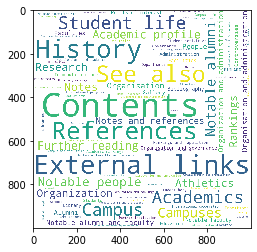

In [120]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dictionary)
plt.imshow(wc)

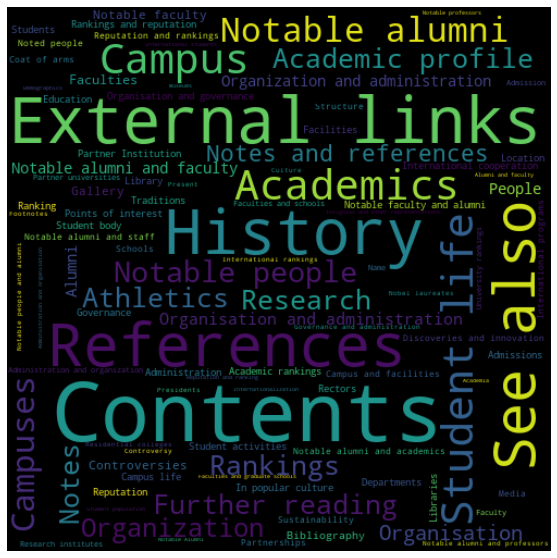

In [123]:
wordcloud = WordCloud(max_words=100, width=500, height=500)
wordcloud.generate_from_frequencies(frequencies=dictionary)
plt.figure(figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [124]:
dictionary

{'Contents': 492,
 'History': 461,
 'Campus': 194,
 'Organization and administration': 35,
 'Academics': 193,
 'Discoveries and innovation': 7,
 'Traditions and student activities': 2,
 'People': 34,
 'See also': 381,
 'Notes': 78,
 'References': 432,
 'External links': 486,
 'Land': 1,
 'Administration and organization': 6,
 'Student life': 210,
 'Further reading': 80,
 'Campuses': 117,
 'Notable people': 94,
 'Literature and popular culture': 1,
 'Bibliography': 18,
 'Buildings and sites': 2,
 'Organisation': 40,
 'Academic profile': 80,
 'Notable alumni': 124,
 'Oxford in literature and other media': 1,
 'Research': 75,
 'Caltech startups': 1,
 'In media and popular culture': 1,
 'Reputation and ranking': 4,
 'Admission and education': 2,
 'Traditions': 13,
 'Notable alumni and faculty': 35,
 'Related Organizations': 1,
 'Gallery': 21,
 'Notes and references': 49,
 'Locations and buildings': 1,
 'Organisation and administration': 36,
 'Notable alumni and academics': 8,
 'In literatu

In [130]:
fre_df=pd.DataFrame(values, index=keys, columns=['Frequency'])

In [141]:
fre_df2=fre_df.sort_values(by='Frequency', ascending=False)

In [139]:
khu_h2=['History','Symbols', 'Academics', 'Campus', 'Facilities', 'Programs' , 
       'Research institutes', 'Rankings', 'Notable alumni', 'See also', 'References']

In [143]:
fre_df2.index

Index(['Contents', 'External links', 'History', 'References', 'See also',
       'Student life', 'Campus', 'Academics', 'Notable alumni', 'Campuses',
       ...
       'Public transportation to Stockholm University',
       'Campuses and infrastructure', 'Significant facts',
       'Related institutions and services', 'Anthem',
       'Departments, institutes and centers', 'Courses and programmes',
       'Field stations', 'Student unions', 'Statistics'],
      dtype='object', length=920)